<a href="https://colab.research.google.com/github/jcalbertin/mba/blob/master/MLP_Univariate_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Univariate Time Series Forecasting - MLP

In [0]:
import tensorflow as tf
from numpy import array
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib64/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib64/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Split Sequence

In [0]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### DataSet

In [0]:
# define input sequence
raw_seq = [1, 3, 4.5, 10, 13, 25, 23.3, 27, 32]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [0]:
X

array([[ 1. ,  3. ,  4.5],
       [ 3. ,  4.5, 10. ],
       [ 4.5, 10. , 13. ],
       [10. , 13. , 25. ],
       [13. , 25. , 23.3],
       [25. , 23.3, 27. ]])

In [0]:
y

array([10. , 13. , 25. , 23.3, 27. , 32. ])

### Model

In [0]:
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='relu', input_dim=n_steps))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [0]:
# fit model
model.fit(X, y, epochs=2000, verbose=1)

Epoch 1/2000
6/6 [==============================] - 0s 12ms/sample - loss: 271.2475
Epoch 2/2000
6/6 [==============================] - 0s 168us/sample - loss: 256.2913
Epoch 3/2000
6/6 [==============================] - 0s 214us/sample - loss: 241.8147
Epoch 4/2000
6/6 [==============================] - 0s 204us/sample - loss: 227.7957
Epoch 5/2000
6/6 [==============================] - 0s 167us/sample - loss: 214.2471
Epoch 6/2000
6/6 [==============================] - 0s 154us/sample - loss: 201.2378
Epoch 7/2000
6/6 [==============================] - 0s 152us/sample - loss: 188.7582
Epoch 8/2000
6/6 [==============================] - 0s 148us/sample - loss: 176.7954
Epoch 9/2000
6/6 [==============================] - 0s 149us/sample - loss: 165.3603
Epoch 10/2000
6/6 [==============================] - 0s 150us/sample - loss: 154.4464
Epoch 11/2000
6/6 [==============================] - 0s 145us/sample - loss: 144.0810
Epoch 12/2000
6/6 [==============================] - 0s 209us/sa

Epoch 98/2000
6/6 [==============================] - 0s 200us/sample - loss: 28.8545
Epoch 99/2000
6/6 [==============================] - 0s 179us/sample - loss: 28.7845
Epoch 100/2000
6/6 [==============================] - 0s 159us/sample - loss: 28.7150
Epoch 101/2000
6/6 [==============================] - 0s 145us/sample - loss: 28.6460
Epoch 102/2000
6/6 [==============================] - 0s 188us/sample - loss: 28.5776
Epoch 103/2000
6/6 [==============================] - 0s 143us/sample - loss: 28.5096
Epoch 104/2000
6/6 [==============================] - 0s 166us/sample - loss: 28.4419
Epoch 105/2000
6/6 [==============================] - 0s 135us/sample - loss: 28.3746
Epoch 106/2000
6/6 [==============================] - 0s 157us/sample - loss: 28.3076
Epoch 107/2000
6/6 [==============================] - 0s 154us/sample - loss: 28.2407
Epoch 108/2000
6/6 [==============================] - 0s 170us/sample - loss: 28.1741
Epoch 109/2000
6/6 [==============================] - 0s

Epoch 194/2000
6/6 [==============================] - 0s 136us/sample - loss: 22.9885
Epoch 195/2000
6/6 [==============================] - 0s 138us/sample - loss: 22.9426
Epoch 196/2000
6/6 [==============================] - 0s 147us/sample - loss: 22.8969
Epoch 197/2000
6/6 [==============================] - 0s 173us/sample - loss: 22.8516
Epoch 198/2000
6/6 [==============================] - 0s 234us/sample - loss: 22.8066
Epoch 199/2000
6/6 [==============================] - 0s 164us/sample - loss: 22.7620
Epoch 200/2000
6/6 [==============================] - 0s 237us/sample - loss: 22.7176
Epoch 201/2000
6/6 [==============================] - 0s 202us/sample - loss: 22.6736
Epoch 202/2000
6/6 [==============================] - 0s 135us/sample - loss: 22.6298
Epoch 203/2000
6/6 [==============================] - 0s 155us/sample - loss: 22.5864
Epoch 204/2000
6/6 [==============================] - 0s 151us/sample - loss: 22.5433
Epoch 205/2000
6/6 [==============================] - 

Epoch 290/2000
6/6 [==============================] - 0s 155us/sample - loss: 19.7737
Epoch 291/2000
6/6 [==============================] - 0s 150us/sample - loss: 19.7475
Epoch 292/2000
6/6 [==============================] - 0s 137us/sample - loss: 19.7244
Epoch 293/2000
6/6 [==============================] - 0s 342us/sample - loss: 19.6994
Epoch 294/2000
6/6 [==============================] - 0s 150us/sample - loss: 19.6721
Epoch 295/2000
6/6 [==============================] - 0s 187us/sample - loss: 19.6481
Epoch 296/2000
6/6 [==============================] - 0s 166us/sample - loss: 19.6243
Epoch 297/2000
6/6 [==============================] - 0s 134us/sample - loss: 19.6000
Epoch 298/2000
6/6 [==============================] - 0s 132us/sample - loss: 19.5753
Epoch 299/2000
6/6 [==============================] - 0s 220us/sample - loss: 19.5501
Epoch 300/2000
6/6 [==============================] - 0s 158us/sample - loss: 19.5246
Epoch 301/2000
6/6 [==============================] - 

Epoch 386/2000
6/6 [==============================] - 0s 223us/sample - loss: 17.5127
Epoch 387/2000
6/6 [==============================] - 0s 214us/sample - loss: 17.4869
Epoch 388/2000
6/6 [==============================] - 0s 222us/sample - loss: 17.4599
Epoch 389/2000
6/6 [==============================] - 0s 181us/sample - loss: 17.4320
Epoch 390/2000
6/6 [==============================] - 0s 328us/sample - loss: 17.4055
Epoch 391/2000
6/6 [==============================] - 0s 304us/sample - loss: 17.3785
Epoch 392/2000
6/6 [==============================] - 0s 195us/sample - loss: 17.3533
Epoch 393/2000
6/6 [==============================] - 0s 156us/sample - loss: 17.3264
Epoch 394/2000
6/6 [==============================] - 0s 228us/sample - loss: 17.2978
Epoch 395/2000
6/6 [==============================] - 0s 144us/sample - loss: 17.2725
Epoch 396/2000
6/6 [==============================] - 0s 239us/sample - loss: 17.2467
Epoch 397/2000
6/6 [==============================] - 

Epoch 482/2000
6/6 [==============================] - 0s 150us/sample - loss: 15.4552
Epoch 483/2000
6/6 [==============================] - 0s 148us/sample - loss: 15.4314
Epoch 484/2000
6/6 [==============================] - 0s 154us/sample - loss: 15.4086
Epoch 485/2000
6/6 [==============================] - 0s 151us/sample - loss: 15.3898
Epoch 486/2000
6/6 [==============================] - 0s 161us/sample - loss: 15.3710
Epoch 487/2000
6/6 [==============================] - 0s 155us/sample - loss: 15.3475
Epoch 488/2000
6/6 [==============================] - 0s 190us/sample - loss: 15.3260
Epoch 489/2000
6/6 [==============================] - 0s 242us/sample - loss: 15.3057
Epoch 490/2000
6/6 [==============================] - 0s 168us/sample - loss: 15.2871
Epoch 491/2000
6/6 [==============================] - 0s 160us/sample - loss: 15.2658
Epoch 492/2000
6/6 [==============================] - 0s 178us/sample - loss: 15.2424
Epoch 493/2000
6/6 [==============================] - 

Epoch 578/2000
6/6 [==============================] - 0s 193us/sample - loss: 13.3645
Epoch 579/2000
6/6 [==============================] - 0s 158us/sample - loss: 13.3431
Epoch 580/2000
6/6 [==============================] - 0s 216us/sample - loss: 13.3224
Epoch 581/2000
6/6 [==============================] - 0s 141us/sample - loss: 13.2993
Epoch 582/2000
6/6 [==============================] - 0s 155us/sample - loss: 13.2775
Epoch 583/2000
6/6 [==============================] - 0s 152us/sample - loss: 13.2535
Epoch 584/2000
6/6 [==============================] - 0s 170us/sample - loss: 13.2305
Epoch 585/2000
6/6 [==============================] - 0s 146us/sample - loss: 13.2081
Epoch 586/2000
6/6 [==============================] - 0s 143us/sample - loss: 13.1836
Epoch 587/2000
6/6 [==============================] - 0s 156us/sample - loss: 13.1613
Epoch 588/2000
6/6 [==============================] - 0s 222us/sample - loss: 13.1402
Epoch 589/2000
6/6 [==============================] - 

Epoch 674/2000
6/6 [==============================] - 0s 183us/sample - loss: 11.2234
Epoch 675/2000
6/6 [==============================] - 0s 196us/sample - loss: 11.1954
Epoch 676/2000
6/6 [==============================] - 0s 155us/sample - loss: 11.1764
Epoch 677/2000
6/6 [==============================] - 0s 181us/sample - loss: 11.1538
Epoch 678/2000
6/6 [==============================] - 0s 176us/sample - loss: 11.1386
Epoch 679/2000
6/6 [==============================] - 0s 161us/sample - loss: 11.1159
Epoch 680/2000
6/6 [==============================] - 0s 157us/sample - loss: 11.0858
Epoch 681/2000
6/6 [==============================] - 0s 149us/sample - loss: 11.0703
Epoch 682/2000
6/6 [==============================] - 0s 147us/sample - loss: 11.0541
Epoch 683/2000
6/6 [==============================] - 0s 129us/sample - loss: 11.0303
Epoch 684/2000
6/6 [==============================] - 0s 159us/sample - loss: 11.0079
Epoch 685/2000
6/6 [==============================] - 

Epoch 770/2000
6/6 [==============================] - 0s 280us/sample - loss: 9.2704
Epoch 771/2000
6/6 [==============================] - 0s 340us/sample - loss: 9.2451
Epoch 772/2000
6/6 [==============================] - 0s 163us/sample - loss: 9.2303
Epoch 773/2000
6/6 [==============================] - 0s 206us/sample - loss: 9.2113
Epoch 774/2000
6/6 [==============================] - 0s 171us/sample - loss: 9.1913
Epoch 775/2000
6/6 [==============================] - 0s 169us/sample - loss: 9.1722
Epoch 776/2000
6/6 [==============================] - 0s 221us/sample - loss: 9.1553
Epoch 777/2000
6/6 [==============================] - 0s 230us/sample - loss: 9.1404
Epoch 778/2000
6/6 [==============================] - 0s 245us/sample - loss: 9.1172
Epoch 779/2000
6/6 [==============================] - 0s 158us/sample - loss: 9.0943
Epoch 780/2000
6/6 [==============================] - 0s 163us/sample - loss: 9.0768
Epoch 781/2000
6/6 [==============================] - 0s 207us/sa

Epoch 867/2000
6/6 [==============================] - 0s 192us/sample - loss: 7.6796
Epoch 868/2000
6/6 [==============================] - 0s 154us/sample - loss: 7.6634
Epoch 869/2000
6/6 [==============================] - 0s 194us/sample - loss: 7.6539
Epoch 870/2000
6/6 [==============================] - 0s 178us/sample - loss: 7.6437
Epoch 871/2000
6/6 [==============================] - 0s 164us/sample - loss: 7.6310
Epoch 872/2000
6/6 [==============================] - 0s 192us/sample - loss: 7.6133
Epoch 873/2000
6/6 [==============================] - 0s 269us/sample - loss: 7.5942
Epoch 874/2000
6/6 [==============================] - 0s 176us/sample - loss: 7.5783
Epoch 875/2000
6/6 [==============================] - 0s 316us/sample - loss: 7.5715
Epoch 876/2000
6/6 [==============================] - 0s 202us/sample - loss: 7.5590
Epoch 877/2000
6/6 [==============================] - 0s 181us/sample - loss: 7.5420
Epoch 878/2000
6/6 [==============================] - 0s 175us/sa

Epoch 964/2000
6/6 [==============================] - 0s 143us/sample - loss: 6.5043
Epoch 965/2000
6/6 [==============================] - 0s 166us/sample - loss: 6.4936
Epoch 966/2000
6/6 [==============================] - 0s 177us/sample - loss: 6.4829
Epoch 967/2000
6/6 [==============================] - 0s 162us/sample - loss: 6.4710
Epoch 968/2000
6/6 [==============================] - 0s 190us/sample - loss: 6.4593
Epoch 969/2000
6/6 [==============================] - 0s 166us/sample - loss: 6.4523
Epoch 970/2000
6/6 [==============================] - 0s 211us/sample - loss: 6.4453
Epoch 971/2000
6/6 [==============================] - 0s 187us/sample - loss: 6.4364
Epoch 972/2000
6/6 [==============================] - 0s 174us/sample - loss: 6.4237
Epoch 973/2000
6/6 [==============================] - 0s 153us/sample - loss: 6.4193
Epoch 974/2000
6/6 [==============================] - 0s 155us/sample - loss: 6.4099
Epoch 975/2000
6/6 [==============================] - 0s 169us/sa

Epoch 1060/2000
6/6 [==============================] - 0s 155us/sample - loss: 5.6869
Epoch 1061/2000
6/6 [==============================] - 0s 169us/sample - loss: 5.6795
Epoch 1062/2000
6/6 [==============================] - 0s 181us/sample - loss: 5.6749
Epoch 1063/2000
6/6 [==============================] - 0s 173us/sample - loss: 5.6693
Epoch 1064/2000
6/6 [==============================] - 0s 168us/sample - loss: 5.6616
Epoch 1065/2000
6/6 [==============================] - 0s 184us/sample - loss: 5.6543
Epoch 1066/2000
6/6 [==============================] - 0s 195us/sample - loss: 5.6419
Epoch 1067/2000
6/6 [==============================] - 0s 151us/sample - loss: 5.6328
Epoch 1068/2000
6/6 [==============================] - 0s 211us/sample - loss: 5.6309
Epoch 1069/2000
6/6 [==============================] - 0s 158us/sample - loss: 5.6235
Epoch 1070/2000
6/6 [==============================] - 0s 200us/sample - loss: 5.6157
Epoch 1071/2000
6/6 [==============================] -

Epoch 1156/2000
6/6 [==============================] - 0s 176us/sample - loss: 5.0447
Epoch 1157/2000
6/6 [==============================] - 0s 320us/sample - loss: 5.0392
Epoch 1158/2000
6/6 [==============================] - 0s 190us/sample - loss: 5.0326
Epoch 1159/2000
6/6 [==============================] - 0s 190us/sample - loss: 5.0269
Epoch 1160/2000
6/6 [==============================] - 0s 162us/sample - loss: 5.0239
Epoch 1161/2000
6/6 [==============================] - 0s 202us/sample - loss: 5.0210
Epoch 1162/2000
6/6 [==============================] - 0s 170us/sample - loss: 5.0125
Epoch 1163/2000
6/6 [==============================] - 0s 231us/sample - loss: 5.0083
Epoch 1164/2000
6/6 [==============================] - 0s 232us/sample - loss: 5.0040
Epoch 1165/2000
6/6 [==============================] - 0s 166us/sample - loss: 4.9969
Epoch 1166/2000
6/6 [==============================] - 0s 231us/sample - loss: 4.9917
Epoch 1167/2000
6/6 [==============================] -

Epoch 1252/2000
6/6 [==============================] - 0s 146us/sample - loss: 4.5813
Epoch 1253/2000
6/6 [==============================] - 0s 169us/sample - loss: 4.5781
Epoch 1254/2000
6/6 [==============================] - 0s 184us/sample - loss: 4.5740
Epoch 1255/2000
6/6 [==============================] - 0s 188us/sample - loss: 4.5688
Epoch 1256/2000
6/6 [==============================] - 0s 156us/sample - loss: 4.5661
Epoch 1257/2000
6/6 [==============================] - 0s 150us/sample - loss: 4.5579
Epoch 1258/2000
6/6 [==============================] - 0s 233us/sample - loss: 4.5550
Epoch 1259/2000
6/6 [==============================] - 0s 431us/sample - loss: 4.5516
Epoch 1260/2000
6/6 [==============================] - 0s 155us/sample - loss: 4.5463
Epoch 1261/2000
6/6 [==============================] - 0s 151us/sample - loss: 4.5391
Epoch 1262/2000
6/6 [==============================] - 0s 175us/sample - loss: 4.5333
Epoch 1263/2000
6/6 [==============================] -

Epoch 1348/2000
6/6 [==============================] - 0s 170us/sample - loss: 4.1152
Epoch 1349/2000
6/6 [==============================] - 0s 163us/sample - loss: 4.1138
Epoch 1350/2000
6/6 [==============================] - 0s 205us/sample - loss: 4.1123
Epoch 1351/2000
6/6 [==============================] - 0s 163us/sample - loss: 4.1063
Epoch 1352/2000
6/6 [==============================] - 0s 170us/sample - loss: 4.1021
Epoch 1353/2000
6/6 [==============================] - 0s 162us/sample - loss: 4.1003
Epoch 1354/2000
6/6 [==============================] - 0s 154us/sample - loss: 4.0954
Epoch 1355/2000
6/6 [==============================] - 0s 204us/sample - loss: 4.0900
Epoch 1356/2000
6/6 [==============================] - 0s 440us/sample - loss: 4.0869
Epoch 1357/2000
6/6 [==============================] - 0s 180us/sample - loss: 4.0826
Epoch 1358/2000
6/6 [==============================] - 0s 158us/sample - loss: 4.0799
Epoch 1359/2000
6/6 [==============================] -

Epoch 1444/2000
6/6 [==============================] - 0s 174us/sample - loss: 3.7552
Epoch 1445/2000
6/6 [==============================] - 0s 140us/sample - loss: 3.7504
Epoch 1446/2000
6/6 [==============================] - 0s 162us/sample - loss: 3.7486
Epoch 1447/2000
6/6 [==============================] - 0s 201us/sample - loss: 3.7447
Epoch 1448/2000
6/6 [==============================] - 0s 214us/sample - loss: 3.7393
Epoch 1449/2000
6/6 [==============================] - 0s 200us/sample - loss: 3.7375
Epoch 1450/2000
6/6 [==============================] - 0s 163us/sample - loss: 3.7362
Epoch 1451/2000
6/6 [==============================] - 0s 175us/sample - loss: 3.7301
Epoch 1452/2000
6/6 [==============================] - 0s 170us/sample - loss: 3.7252
Epoch 1453/2000
6/6 [==============================] - 0s 229us/sample - loss: 3.7219
Epoch 1454/2000
6/6 [==============================] - 0s 283us/sample - loss: 3.7211
Epoch 1455/2000
6/6 [==============================] -

Epoch 1540/2000
6/6 [==============================] - 0s 211us/sample - loss: 3.3942
Epoch 1541/2000
6/6 [==============================] - 0s 184us/sample - loss: 3.3887
Epoch 1542/2000
6/6 [==============================] - 0s 163us/sample - loss: 3.3864
Epoch 1543/2000
6/6 [==============================] - 0s 162us/sample - loss: 3.3815
Epoch 1544/2000
6/6 [==============================] - 0s 183us/sample - loss: 3.3783
Epoch 1545/2000
6/6 [==============================] - 0s 138us/sample - loss: 3.3748
Epoch 1546/2000
6/6 [==============================] - 0s 140us/sample - loss: 3.3698
Epoch 1547/2000
6/6 [==============================] - 0s 211us/sample - loss: 3.3669
Epoch 1548/2000
6/6 [==============================] - 0s 179us/sample - loss: 3.3619
Epoch 1549/2000
6/6 [==============================] - 0s 136us/sample - loss: 3.3591
Epoch 1550/2000
6/6 [==============================] - 0s 144us/sample - loss: 3.3575
Epoch 1551/2000
6/6 [==============================] -

Epoch 1636/2000
6/6 [==============================] - 0s 178us/sample - loss: 3.0301
Epoch 1637/2000
6/6 [==============================] - 0s 178us/sample - loss: 3.0257
Epoch 1638/2000
6/6 [==============================] - 0s 188us/sample - loss: 3.0229
Epoch 1639/2000
6/6 [==============================] - 0s 151us/sample - loss: 3.0200
Epoch 1640/2000
6/6 [==============================] - 0s 156us/sample - loss: 3.0144
Epoch 1641/2000
6/6 [==============================] - 0s 146us/sample - loss: 3.0109
Epoch 1642/2000
6/6 [==============================] - 0s 199us/sample - loss: 3.0083
Epoch 1643/2000
6/6 [==============================] - 0s 246us/sample - loss: 3.0046
Epoch 1644/2000
6/6 [==============================] - 0s 338us/sample - loss: 3.0002
Epoch 1645/2000
6/6 [==============================] - 0s 416us/sample - loss: 2.9979
Epoch 1646/2000
6/6 [==============================] - 0s 229us/sample - loss: 2.9937
Epoch 1647/2000
6/6 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Prediction

In [0]:
x_input = array([23.3, 27, 32])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[35.938984]]


### Plot

In [0]:
x = list(range(0,len(raw_seq)))
y = raw_seq

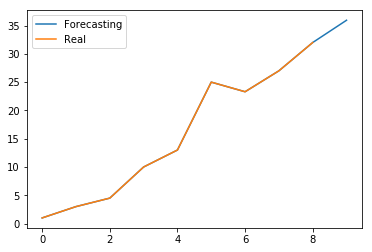

In [0]:
ax = sns.lineplot(x= x + [len(raw_seq)] , y= y + list(yhat[0]), label="Forecasting")
ax = sns.lineplot(x= x, y=y, label="Real")